# Project #4 "Cumminicate Data Findings"
# By **Abdelrahman Rashwan** 
# Dataset: Bike Sharing Dataset

**In this project a dataset is chosen to be explored , cleaned and explained.
    Questions will be asked, answered and communicated through  an explarotary data analysis slide show**

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gather)
- [Part II - Assessing Data](#assess)
- [Part III - Cleaning Data](#clean)
- [Part IV - Univariate Exploration](#univariate)
- [Part V - Bivariate and Multivariate exploration](#bivariate)


In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import time
import sys
import os
import gc
import glob
import sklearn
from sklearn.cluster import KMeans


%matplotlib inline

In [57]:
sys.version

'3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]'

In [145]:
#Documenting libraries' versions in use ( wil also included in the readme file)
libs = [pd,np,sns, matplotlib,sklearn]
for lib in libs :
    print("{}".format(str(lib).split()[1])+" "+'version in use ', lib.__version__)

'pandas' version in use  1.0.3
'numpy' version in use  1.18.1
'seaborn' version in use  0.10.1
'matplotlib' version in use  3.1.3
'sklearn' version in use  0.22.1


> This dataset was curated from Udacity's dataset options and downloaded from this website https://s3.amazonaws.com/baywheels-data/index.html.
Data from jan 2018 till december 2018 were chosen


## Part I Gathering the data

In [61]:
#creating a list of file names
path = "D:\Python\Data Analyst\Communicate Findings\data"
all_files = glob.glob(os.path.join(path, "*.csv"))

In [62]:
all_files

['D:\\Python\\Data Analyst\\Communicate Findings\\data\\201801-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201802-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201803-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201804-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201805-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201806-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201807-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201808-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201809-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201810-fordgobike-tripdata.csv',
 'D:\\Python\\Data Analyst\\Communicate Findings\\data\\201811-fordgobike-tripdata.csv',
 'D:\\Python\\Data An

In [63]:
#concating all files into one dataframe file
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

In [64]:
#saving data frame to csv file
df.to_csv('D:\\Python\\Data Analyst\\Communicate Findings\\data\\master_file.csv', index=False)

In [65]:
#loading in the data
df = pd.read_csv('D:\\Python\\Data Analyst\\Communicate Findings\\data\\master_file.csv')

In [66]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


## Part II Assessing the Data

In [75]:
#quick overview of the data
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [72]:
#check for potential duplicates
df.duplicated().sum()

0

In [84]:
df.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

In [85]:
df.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

<a id='issues'></a>
**Quality issues**

* start time and end time are objects not a timestamps
* user type can be set to category
* bike_share_for_all_trip can be set to boolean
* there are null values, and look like they are not missing at random
* we can further enhance the dataset with more details about the time like month, day, hour, weekday
* we can calculate the distance for rides between stations
* duration in seconds can be transformed into minutes and rounded as integers

## Part III Cleaning data

In [80]:
#drop columns that are not going to be part of the analysis
df.drop(columns=['start_station_id','end_station_id','bike_id'], inplace=True)

In [81]:
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

**Define**
<br>Set appropriate data types for fields mentioned in the [Quality issues](#issues)

In [79]:
#transforming start time and end time into date_time format in pandas

df['start_time']= pd.to_datetime(df.start_time)
df['end_time']= pd.to_datetime(df.end_time)

In [83]:
#transforming user type and gender into categories
df['user_type'] = df['user_type'].astype('category')

In [87]:
#transforming bikeshare for all column to boolean
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].replace({'Yes': True, 'No': 'False'} )

In [91]:
#recheck dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 11 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_name         object        
 7   end_station_latitude     float64       
 8   end_station_longitude    float64       
 9   user_type                category      
 10  bike_share_for_all_trip  object        
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 144.0+ MB


In [93]:
#extract month
df['month']=df['start_time'].dt.strftime('%B')

In [95]:
df['month'].value_counts()

October      201458
July         199222
June         195968
August       192162
September    186217
May          179125
November     134135
December     131363
April        131169
March        111382
February     106718
January       94802
Name: month, dtype: int64

In [97]:
#extract weekday
df['day']=df['start_time'].dt.strftime('%a')

In [98]:
df['day'].value_counts()

Tue    319332
Wed    316374
Thu    314124
Mon    294573
Fri    290390
Sat    175614
Sun    153314
Name: day, dtype: int64

In [100]:
#extract hour
df['hour']=df['start_time'].dt.hour

In [120]:
#transforming duration_sec columns into duration _min
df['duration_min'] = df['duration_sec']/60

In [121]:
df['duration_min'] = np.round(df['duration_min'])
df['duration_min'] = df['duration_min'].astype(int)

In [123]:
#drop start_time , end_time and duration_sec columns
df.drop(columns=['start_time','end_time', 'duration_sec'], inplace=True)

In [124]:
df.head()

,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,month,day,hour,duration_min
0,Mission Dolores Park,37.761420,-122.426435,Webster St at O'Farrell St,37.783521,-122.431158,Subscriber,False,January,Wed,22,1255
1,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,False,January,Wed,16,1424
2,Jackson St at 5th St,37.348759,-121.894798,5th St at Virginia St,37.325998,-121.877120,Customer,False,January,Wed,14,1193
3,Market St at Franklin St,37.773793,-122.421239,4th St at Harrison St,37.780955,-122.399749,Customer,False,January,Wed,14,1018
4,Laguna St at Hayes St,37.776435,-122.426244,Post St at Kearny St,37.788975,-122.403452,Subscriber,False,January,Wed,19,666


In [125]:
df.isnull().sum()

start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
user_type                      0
bike_share_for_all_trip        0
month                          0
day                            0
hour                           0
duration_min                   0
dtype: int64

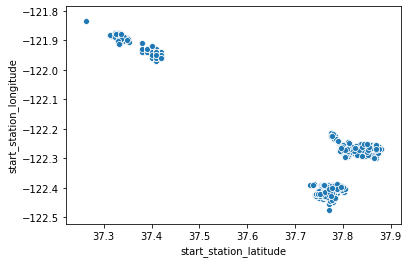

In [139]:
sns.scatterplot(data=df.sample(20000), x='start_station_latitude', y='start_station_longitude');

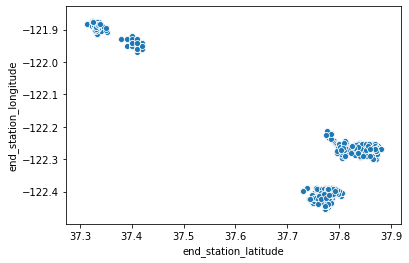

In [168]:
sns.scatterplot(data=df.sample(20000), x='end_station_latitude', y='end_station_longitude');

#### as seen from above 2 scatter plots, both start and end stations are located in 3 zones

#### a different approach will be taken towards the null values for the start and end station names 
#### kmeans will be used to generate labels based on lattitude and longtitude for both start and end stations and will be labeled as zone 1,2 and 3

In [202]:
#fit kmeans model to start latitude and longtitude
km_start = KMeans(n_clusters=3, random_state=0, init='random')
km_start.fit(df[['start_station_latitude','start_station_longitude']])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [203]:
#generate labels and replace them with zone 1 , 2 and 3
df['start_zone'] = km_start.labels_
df['start_zone'] = df['start_zone'].replace({0:'Zone 1', 1:'Zone 2',2:'Zone 3'})
df['start_zone'] = df['start_zone'].astype('category')

In [204]:
df['start_zone'].value_counts()

Zone 1    1362601
Zone 3     401863
Zone 2      99257
Name: start_zone, dtype: int64

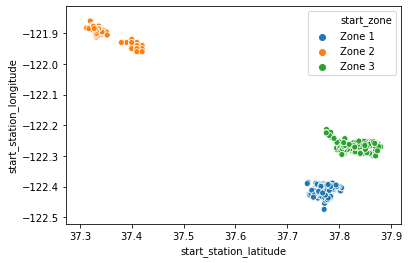

In [205]:
sns.scatterplot(data=df.sample(10000), x='start_station_latitude', y='start_station_longitude', hue='start_zone');

In [206]:
km_end = KMeans(n_clusters=3, random_state=0, init='random')
km_end.fit(df[['end_station_latitude','end_station_longitude']])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [207]:
df['end_zone'] = km_end.labels_
df['end_zone'] = df['end_zone'].replace({0:'Zone 1', 1:'Zone 2', 2:'Zone 3'})
df['end_zone'] = df['end_zone'].astype('category')

In [209]:
df['end_zone'].value_counts()

Zone 1    1362641
Zone 3     401822
Zone 2      99258
Name: end_zone, dtype: int64

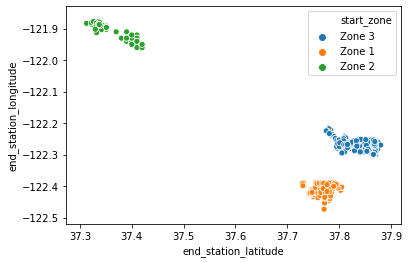

In [210]:
sns.scatterplot(data=df.sample(10000), x='end_station_latitude', y='end_station_longitude', hue='start_zone');

In [211]:
df.head()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,month,day,hour,duration_min,start_zone,end_zone
0,37.761420,-122.426435,37.783521,-122.431158,Subscriber,False,January,Wed,22,1255,Zone 1,Zone 1
1,37.795392,-122.394203,37.795392,-122.394203,Customer,False,January,Wed,16,1424,Zone 1,Zone 1
2,37.348759,-121.894798,37.325998,-121.877120,Customer,False,January,Wed,14,1193,Zone 2,Zone 2
3,37.773793,-122.421239,37.780955,-122.399749,Customer,False,January,Wed,14,1018,Zone 1,Zone 1
4,37.776435,-122.426244,37.788975,-122.403452,Subscriber,False,January,Wed,19,666,Zone 1,Zone 1


In [163]:
df.isnull().sum()

start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
user_type                  0
bike_share_for_all_trip    0
month                      0
day                        0
hour                       0
duration_min               0
start_zone                 0
end_zone                   0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 12 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   start_station_latitude   float64 
 1   start_station_longitude  float64 
 2   end_station_latitude     float64 
 3   end_station_longitude    float64 
 4   user_type                category
 5   bike_share_for_all_trip  object  
 6   month                    object  
 7   day                      object  
 8   hour                     int64   
 9   duration_min             int32   
 10  start_zone               category
 11  end_zone                 category
dtypes: category(3), float64(4), int32(1), int64(1), object(3)
memory usage: 126.2+ MB


In [212]:
df.to_csv('D:\Python\Data Analyst\Communicate Findings\data\clean_master_file.csv', index=False)

In [5]:
#df = pd.read_csv('D:\Python\Data Analyst\Communicate Findings\data\clean_master_file.csv')
#df.head()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,month,day,hour,duration_min,start_zone,end_zone
0,37.761420,-122.426435,37.783521,-122.431158,Subscriber,False,January,Wed,22,1255,Zone 1,Zone 1
1,37.795392,-122.394203,37.795392,-122.394203,Customer,False,January,Wed,16,1424,Zone 1,Zone 1
2,37.348759,-121.894798,37.325998,-121.877120,Customer,False,January,Wed,14,1193,Zone 2,Zone 2
3,37.773793,-122.421239,37.780955,-122.399749,Customer,False,January,Wed,14,1018,Zone 1,Zone 1
4,37.776435,-122.426244,37.788975,-122.403452,Subscriber,False,January,Wed,19,666,Zone 1,Zone 1


### What is the structure of your dataset?

Originally there were approx. 185,000 bike rides that happen in 2018 in the San Francisco Bay Area. The dataset contained features about:
 * trip duration: start/end time, how long the trip took in seconds
 * stations: start/end station, name, geolocation (latitude/longitude)
 * user type
 * rented bikes: bike id

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:
 * rental time: month, day, hour of the day, weekday

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month) and if the service is mostly used by members or casual riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the start time will be most exploited in my analysis as well as customer related data. I expect that location and datetime will have the strongest effect on bike demand.


<a id='univariate'></a>
## Part IV - Univariate Exploration

I'll start by looking at the monthly trend of number of bike rentals and distribution of weekdays and hours of the day. I will also explore the duration of the trips.

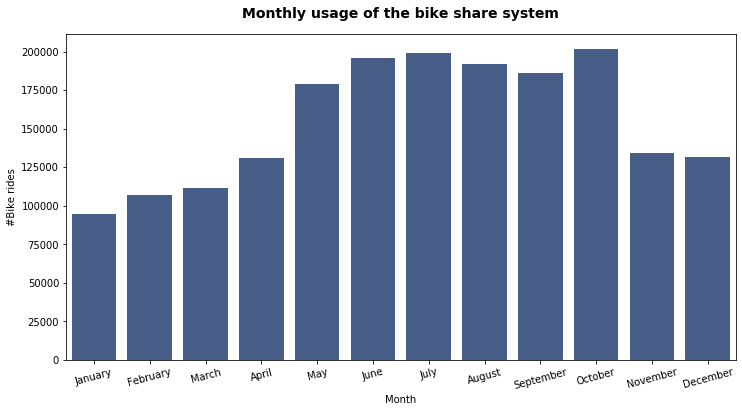

In [237]:
plt.figure(figsize=(12,6));
color = sns.xkcd_rgb["denim blue"]


g = sns.countplot(data=df, x='month', color=color);
plt.title('Monthly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');
plt.xlabel('Month')
plt.ylabel('#Bike rides')
plt.xticks(rotation=15);

**Winter months are the worst for the bike sharing system most probably due to the weather conditions. The bike renting is high in demand between May and October, reaching its peak in October, followed by July.**

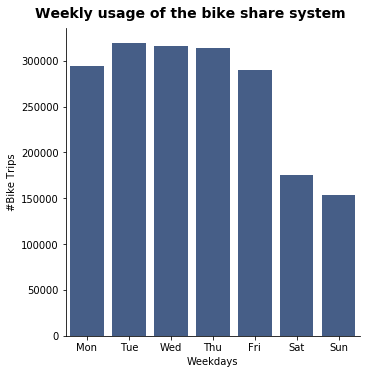

In [241]:
# weekday usege of the bike sharing system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

g = sns.catplot(data=df, x='day', kind='count', color = color, order=weekday)
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

**it seems that tuesday is higher in demand on weekdays than weekends which suggests that the bike sharing system is mainly used for school/work commmutes**

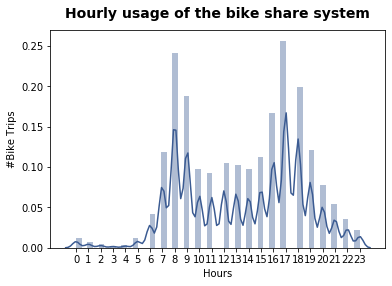

In [250]:
# hourly usege of the bike sharing system
bins = range(0,df['hour'].max()+1,1)
g = sns.distplot(df['hour'], color = color)
plt.xlabel("Hours")
plt.ylabel( "#Bike Trips")
plt.xticks(bins)
plt.title('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

**The hoursly distribution is bimodal, peaking at 8am and 5pm which suggests the start and end of a school/work day**

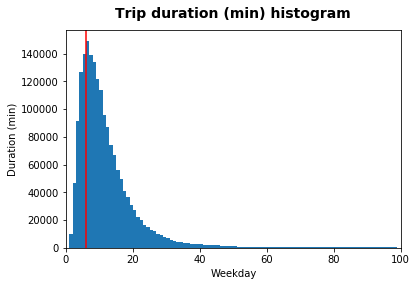

In [274]:
bin_edges = range(0,df['duration_min'].max()+1, 1)
plt.hist(data = df, x = 'duration_min', bins = bin_edges)
plt.xlim(0,100)
plt.axvline(df['duration_min'].mode().values,color='r')
plt.title("Trip duration (min) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (min)');

**Looking at the histogram, we can see that trip durations are usually no longer than 30 mins and usually last 6 to 20 min. This can be explained by the trips are usually short in time probably due to the closeness of their homes to workplace/school which is why they chose to use a bike in the first place.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was one unusal points for the duration (min), which in some cases lasted more than 24h, probably because people sometimes forget to logout after they're done wiht the trip. For the histogram I set the max range to 100 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No

# Part V - Bivariate and Multivariate exploration


In [7]:
#getting number of customers and subscribers 
customer = df[df['user_type']=='Customer'].shape[0]
subscriber = df[df['user_type']=='Subscriber'].shape[0]

#getting customers and subscribers proportions
cust_prop = customer/df.shape[0]
sub_prop =  subscriber/df.shape[0]

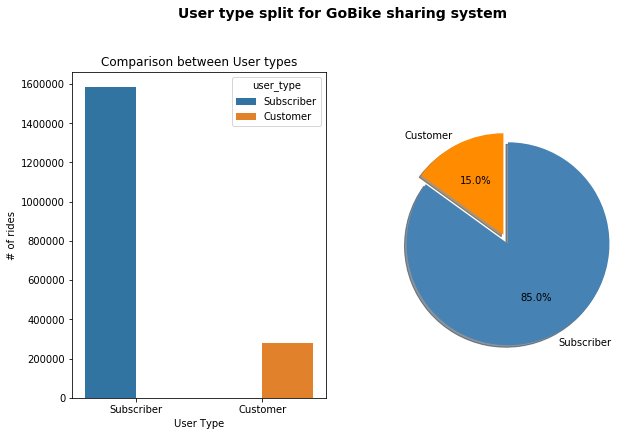

In [27]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(data=df,x=df.user_type, hue=df.user_type)
plt.xlabel('User Type')
plt.ylabel('# of rides')
plt.title('Comparison between User types')


plt.subplot(1,2,2)
plt.pie([cust_prop,sub_prop], explode = (0,0.1) , colors = ['darkorange', 'steelblue'],
        labels= ['Customer', 'Subscriber'], shadow=True , startangle=90, autopct='%1.1f%%')
plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

**As it appears that the bulk of users are registered subscribers while casual customers make up for 15% of the userbase, perhaps it's wise to simplify the registration process to encourage users to convert into subscribers**

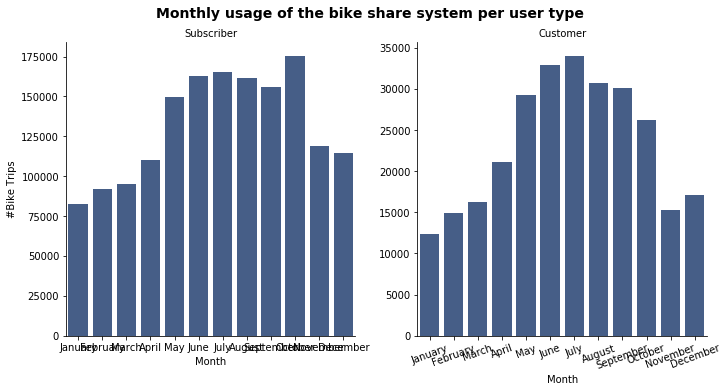

In [48]:
# monthly usege of the bike sharing system per user type
g = sns.catplot(data=df, x='month', col="user_type", kind='count', sharey = False,
            color = color)
g.set_axis_labels("Month", "#Bike Trips")
g.set_titles("{col_name}")
plt.xticks(rotation=20)
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather.
<br>
<br>For **Customers,** the bike renting is high in demand around summertime, reaching its peak in July. Customers are most probably occasional reiders or tourist coming to visit the Bay Area. For **Subscribers,** the highest demand is from May till October, reaching it's peak in October. Customers are most probably regular riders using bikes for a daily commute.

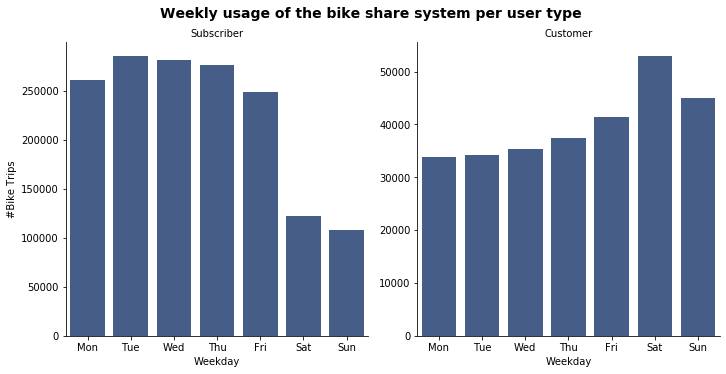

In [49]:
# weekday usege of the bike sharing system per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='day', col="user_type", kind='count', sharey = False,
            color = color, order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

There is a different trend on which days customers and subscribers rent bikes. As mentioned above **customers** are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, **subscribers** are most probably daily work/school commuters who use the system within a week.
<br>
<br>Next, I am going to check when within a day bikes are high in demand.

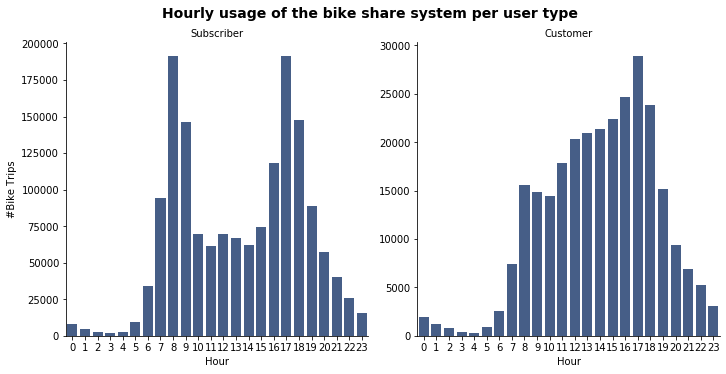

In [50]:
# hourly usege of the bike sharing system per user type

g = sns.catplot(data=df, x='hour', col="user_type", kind='count', sharey = False,
            color = color)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

There is also a different trend of when during the day bikes are rented most often. **Customers** use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. **Subscribers** on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.
<br>
<br>Next, I am going to check how the trip duration varies between customers and subscribers.

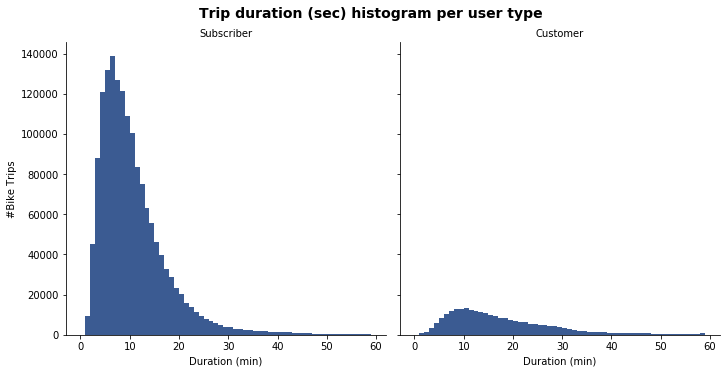

In [52]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(df, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 60,1)
g.map(plt.hist, "duration_min", color=color, bins=bin_edges)
g.set_axis_labels("Duration (min)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

Looking at histograms, we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above **customers** are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). **Subscribers** are daily commuters, who also use the system around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. **Customers** trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. **Subscribers** on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.